In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Flatten, Conv2D, MaxPool2D, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "/content/drive/My Drive/mnist_data.csv" "mnist_data.csv"

In [0]:
mnist_csv = np.genfromtxt("mnist_data.csv", delimiter=",")

In [0]:
X = mnist_csv[:, :-1]
y = mnist_csv[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y)

In [0]:
X_train = X_train.reshape(21000,28,28,1)
X_test = X_test.reshape(14000,28,28,1)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
X_next, X_valid, y_next, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [0]:
datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        zoom_range=0.05,
        fill_mode='nearest')
datagen.fit(X_next)

In [0]:
second_model = Sequential()

second_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

second_model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
second_model.add(Dropout(0.5))
second_model.add(MaxPool2D(pool_size=(2,2),strides = (2,2)))


second_model.add(Flatten())
second_model.add(Dense(1000, activation = "relu"))
second_model.add(Dropout(0.5))
second_model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
Optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
second_model.compile(optimizer= Optimizer,metrics= ['accuracy'], loss = 'categorical_crossentropy')

In [0]:
epoch = 20
batch_size = 100

In [0]:
Second_train_model = second_model.fit_generator(datagen.flow(X_next,y_next),\
                           epochs=epoch,verbose=1,steps_per_epoch = (len(X_next)//batch_size),\
                                                validation_data=(X_valid, y_valid))

Epoch 1/20
189/189 [==============================] - 94s 496ms/step - loss: 0.0468 - acc: 0.9853 - val_loss: 0.0423 - val_acc: 0.9886
Epoch 2/20
189/189 [==============================] - 93s 494ms/step - loss: 0.0428 - acc: 0.9878 - val_loss: 0.0401 - val_acc: 0.9876
Epoch 3/20
189/189 [==============================] - 93s 491ms/step - loss: 0.0479 - acc: 0.9873 - val_loss: 0.0425 - val_acc: 0.9890
Epoch 4/20
189/189 [==============================] - 93s 492ms/step - loss: 0.0335 - acc: 0.9914 - val_loss: 0.0590 - val_acc: 0.9857
Epoch 5/20
189/189 [==============================] - 93s 494ms/step - loss: 0.0441 - acc: 0.9851 - val_loss: 0.0395 - val_acc: 0.9895
Epoch 6/20
189/189 [==============================] - 93s 493ms/step - loss: 0.0461 - acc: 0.9879 - val_loss: 0.0412 - val_acc: 0.9895
Epoch 7/20
189/189 [==============================] - 93s 492ms/step - loss: 0.0339 - acc: 0.9891 - val_loss: 0.0401 - val_acc: 0.9910
Epoch 8/20
189/189 [==============================] - 9

In [0]:
test_result = second_model.evaluate(X_test,y_test, verbose = 1)

14000/14000 [==============================] - 41s 3ms/step


In [0]:
test_result

[0.03352519419590992, 0.9907142857142858]

In [0]:
accuracy = Second_train_model.history['acc']
val_accuracy = Second_train_model.history['val_acc']
loss = Second_train_model.history['loss']
val_loss = Second_train_model.history['val_loss']
epochs = range(len(accuracy))

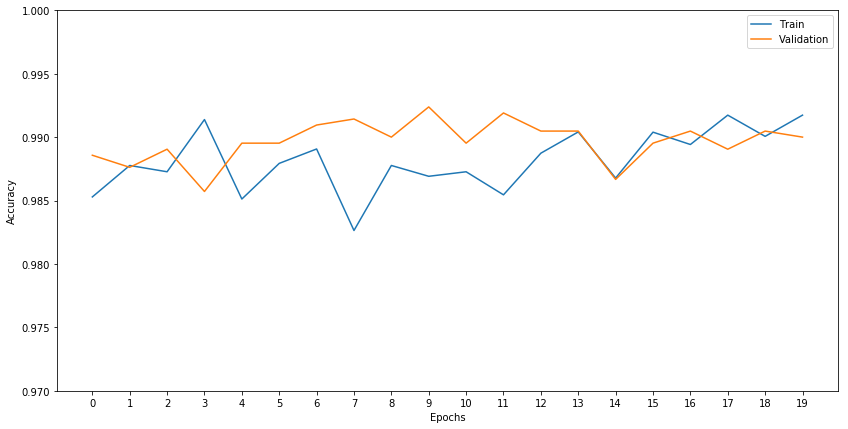

In [0]:
plt.figure(figsize = (14,7))
plt.plot(accuracy, label = 'Train')
plt.plot(val_accuracy, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.97,1])
plt.xticks(epochs);

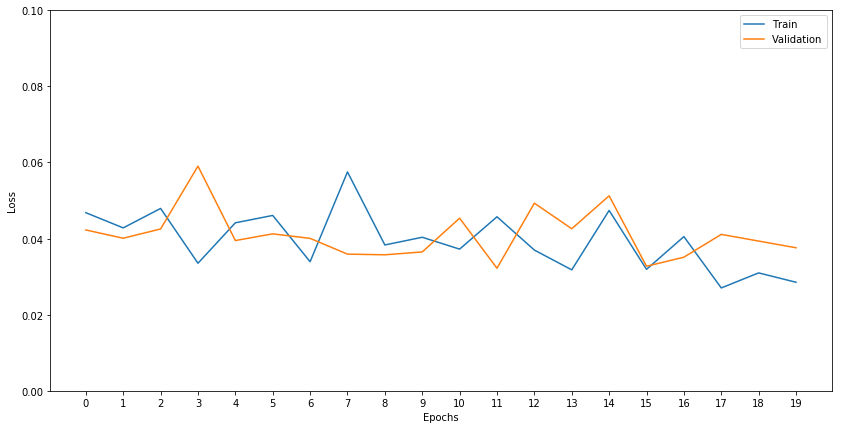

In [0]:
plt.figure(figsize = (14,7))
plt.plot(loss, label = 'Train')
plt.plot(val_loss, label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0,0.1])
plt.xticks(epochs);

In [0]:
Y_pred = second_model.predict(X_test)

In [0]:
y_pred_class = np.argmax(Y_pred, axis = 1)

In [0]:
y_test = np.argmax(y_test,axis = 1)

In [0]:
error = (np.where(y_test - y_pred_class != 0))[0]

In [0]:
len(error)

130

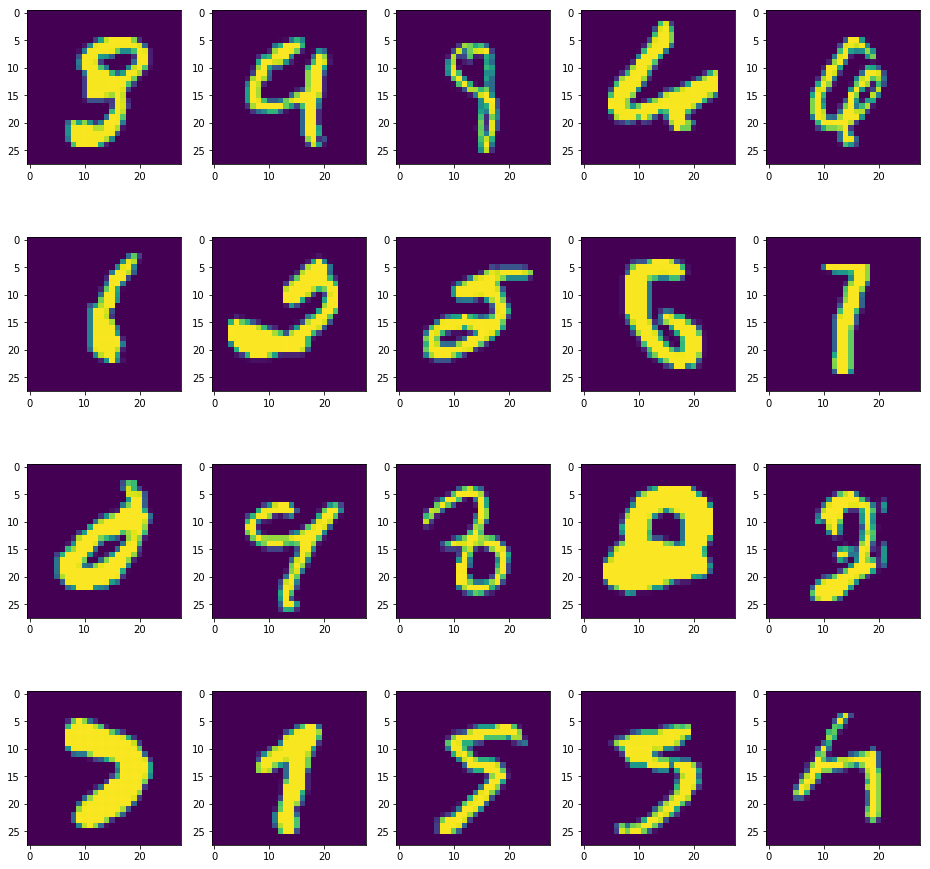

In [0]:
fig=plt.figure(figsize = [16,16])
for i in range(0,20):
    img = (np.reshape(X_test[error[i]], (28, 28)))
    fig.add_subplot(4,5,i+1)
    plt.imshow(img)
plt.show()